<a href="https://colab.research.google.com/github/menna161/Mining-API-Usage-Patterns/blob/main/Reimplementing-EG-Tool/FromCodetoPattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import ast
import astor

# Input Examples

In [3]:
ex1 = '''
x = txt.split()
print(x)
'''


ex2 ='''
for line in content.split('.'):
    print(line)
'''

ex3 = '''
words = dir.split('/')
return words[0]
'''

ex4 = '''
lines = k.split(".")
first = lines.pop()
'''

ex5 = '''
parts  = k.split('.')
line = lines.pop()
'''

ex6 = '''
parts = package_name.split('.')
name = parts.pop()
'''

# Convert Code to AST

In [4]:
tree1 = ast.parse(ex1)
tree2 = ast.parse(ex2)
tree3 = ast.parse(ex3)
tree4 = ast.parse(ex4)
tree5 = ast.parse(ex5)
tree6 = ast.parse(ex6)


dumpp1 = ast.dump(tree1)
dumpp2 = ast.dump(tree2)
dumpp3 = ast.dump(tree3)
dumpp4 = ast.dump(tree4)
dumpp5 = ast.dump(tree5)
dumpp6 = ast.dump(tree6)


print("ex1", dumpp1)
print("ex2", dumpp2)
print("ex3", dumpp3)
print("ex4", dumpp4)
print("ex5", dumpp5)
print("ex6", dumpp6)


ex1 Module(body=[Assign(targets=[Name(id='x', ctx=Store())], value=Call(func=Attribute(value=Name(id='txt', ctx=Load()), attr='split', ctx=Load()), args=[], keywords=[])), Expr(value=Call(func=Name(id='print', ctx=Load()), args=[Name(id='x', ctx=Load())], keywords=[]))])
ex2 Module(body=[For(target=Name(id='line', ctx=Store()), iter=Call(func=Attribute(value=Name(id='content', ctx=Load()), attr='split', ctx=Load()), args=[Str(s='.')], keywords=[]), body=[Expr(value=Call(func=Name(id='print', ctx=Load()), args=[Name(id='line', ctx=Load())], keywords=[]))], orelse=[])])
ex3 Module(body=[Assign(targets=[Name(id='words', ctx=Store())], value=Call(func=Attribute(value=Name(id='dir', ctx=Load()), attr='split', ctx=Load()), args=[Str(s='/')], keywords=[])), Return(value=Subscript(value=Name(id='words', ctx=Load()), slice=Index(value=Num(n=0)), ctx=Load()))])
ex4 Module(body=[Assign(targets=[Name(id='lines', ctx=Store())], value=Call(func=Attribute(value=Name(id='k', ctx=Load()), attr='split',

# AST To Gspan Format

In [5]:
code_snippets = [tree1, tree2, tree3, tree4, tree5, tree6]

file = open("input.txt", "w")
i=0


# print(code_snippets)
for snippet_tree in code_snippets:
  file_write= []
  v_n = 0;
  parent_n = -1;
  file.write(f't # {i}\n')
  file.write(f'v 0 Module\n')
  i+=1
  # print("tree source code")
  # print(astor.to_source(snippet_tree))


  for node in ast.walk(snippet_tree):
      n = str(node).split()[0][6:]
      parent_n += 1
      children = []
      e_n = 0
      # print("Node", parent_n, n)

      for x in ast.iter_child_nodes(node): 
          child = type(x).__name__
          # print("childdd", child)
          name = x._fields
          # print("nameee", name)
          for item,val in ast.iter_fields(x):
            if(item in ("name","id","attr")):
              child = str(child)+ "#"+item+"="+val
          v_n +=1
          # print(f'v {v_n} {child}\n')
          # print("---Children",child )
          # print("list children ",list(ast.iter_child_nodes(node)))
          file_write.append('v '+str(v_n)+' '+str(child)+'\n')
          # print(file_write)
          children.append([child,v_n])



      # print("children ", children)
      # print("list ",list(ast.iter_fields(node)))
      edges_list = list(ast.iter_fields(node))

      for edge in list(ast.iter_fields(node)):
      #   print("edge ", edge)
        
        if not(edge[0] in ("name","id","attr","str")) and len(children) > 0:
          # print("edge[0] ", edge[0])
          # print("edge[1] ", edge[1])

          if isinstance(edge[1], list):
            if(len(edge[1]) == 1 ):
                # print(f'e {parent_n} {children[e_n][1]} {edge[0]}\n')
                # print(f'e {parent_n} {children[e_n][1]} {edge[0]}\n')
                file_write.append('e '+str(parent_n)+' '+str(children[e_n][1])+' '+str(edge[0])+'\n')
                e_n+=1
            else:
              edge_name_n = 0;
              for node in edge[1]:
                # print("node ",node)
                # print(f'e {parent_n} {children[e_n][1]} {edge[0]+str(edge_name_n)}\n')
                # file.write(f'e {parent_n} {children[e_n][1]} {edge[0]+str(edge_name_n)}\n')
                file_write.append('e '+str(parent_n)+' '+str(children[e_n][1])+' '+str(edge[0]+str(edge_name_n))+'\n')
                e_n+=1
                edge_name_n+=1
          else:
            # print(f'e {parent_n} {children[e_n][1]} {edge[0]}\n')
            # file.write(f'e {parent_n} {children[e_n][1]} {edge[0]}\n')
            file_write.append('e '+str(parent_n)+' '+str(children[e_n][1])+' '+str(edge[0])+'\n')
            # print("e_n ", e_n)
            e_n+=1

  # print("not sorted")
  # print(file_write)
  file_write.sort()
  # print("sorted")
  # print(file_write)
  for y in reversed(file_write):
    file.write(y)
        

file.write("t # -1\n")
file.close()



# Minning Common Patter with Gspan

In [6]:
!pip install gspan-mining

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!python -m gspan_mining -s 3 ./input.txt #max vertices , support 50%

t # 0
v 0 Attribute#attr=split
v 1 Load
e 0 1 ctx

Support: 6

-----------------

t # 1
v 0 Attribute#attr=split
v 1 Load
v 2 Call
e 0 1 ctx
e 0 2 func

Support: 6

-----------------

t # 2
v 0 Attribute#attr=split
v 1 Load
v 2 Call
v 3 Str
e 0 1 ctx
e 0 2 func
e 2 3 args

Support: 5

-----------------

t # 3
v 0 Attribute#attr=split
v 1 Call
e 0 1 func

Support: 6

-----------------

t # 4
v 0 Attribute#attr=split
v 1 Call
v 2 Str
e 0 1 func
e 1 2 args

Support: 5

-----------------

t # 5
v 0 Assign
v 1 Call
e 0 1 value

Support: 5

-----------------

t # 6
v 0 Assign
v 1 Call
v 2 Attribute#attr=split
e 0 1 value
e 1 2 func

Support: 5

-----------------

t # 7
v 0 Assign
v 1 Call
v 2 Attribute#attr=split
v 3 Load
e 0 1 value
e 1 2 func
e 2 3 ctx

Support: 5

-----------------

t # 8
v 0 Assign
v 1 Call
v 2 Str
e 0 1 value
e 1 2 args

Support: 4

-----------------

t # 9
v 0 Assign
v 1 Call
v 2 Str
v 3 Attribute#attr=split
e 0 1 value
e 1 2 args
e 1 3 func

Support: 4

--------------

In [8]:
# t # 27
# v 0 Assign
# v 1 Module
# v 2 Assign
# v 3 Call
# v 4 Attribute#attr=pop
# v 5 Load
# v 6 Call
# v 7 Str
# v 8 Attribute#attr=split
# v 9 Load
# e 0 1 body0
# e 0 6 value
# e 1 2 body1
# e 2 3 value
# e 3 4 func
# e 4 5 ctx
# e 6 7 args
# e 6 8 func
# e 8 9 ctx

# Support: 3

In [9]:
from gspan_mining.config import parser
from gspan_mining.main import main

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
!python -m gspan_mining -h

usage: __main__.py [-h] [-s MIN_SUPPORT] [-n NUM_GRAPHS]
                   [-l LOWER_BOUND_OF_NUM_VERTICES]
                   [-u UPPER_BOUND_OF_NUM_VERTICES] [-d DIRECTED] [-v VERBOSE]
                   [-p PLOT] [-w WHERE]
                   database_file_name

positional arguments:
  database_file_name    str, database file name

optional arguments:
  -h, --help            show this help message and exit
  -s MIN_SUPPORT, --min_support MIN_SUPPORT
                        min support, default 5000
  -n NUM_GRAPHS, --num_graphs NUM_GRAPHS
                        only read the first n graphs in the given database,
                        default inf, i.e. all graphs
  -l LOWER_BOUND_OF_NUM_VERTICES, --lower_bound_of_num_vertices LOWER_BOUND_OF_NUM_VERTICES
                        int, lower bound of number of vertices of output
                        subgraph, default 2
  -u UPPER_BOUND_OF_NUM_VERTICES, --upper_bound_of_num_vertices UPPER_BOUND_OF_NUM_VERTICES
                     

In [12]:
args_str = '-s 3  -d False -l 3 -p True  -w True input.txt'
#args_str = '-s 3 -d True -l 5 -p True -w True final.txt'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

t # 0
v 0 Attribute#attr=split
v 1 Load
v 2 Call
e 0 1 ctx
e 0 2 func

Support: 6


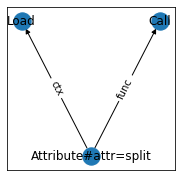

where: [0, 1, 2, 3, 4, 5]

-----------------

t # 1
v 0 Attribute#attr=split
v 1 Load
v 2 Call
v 3 Str
e 0 1 ctx
e 0 2 func
e 2 3 args

Support: 5


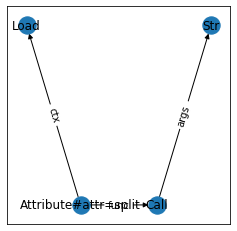

where: [1, 2, 3, 4, 5]

-----------------

t # 2
v 0 Attribute#attr=split
v 1 Call
v 2 Str
e 0 1 func
e 1 2 args

Support: 5


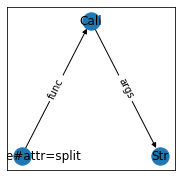

where: [1, 2, 3, 4, 5]

-----------------

t # 3
v 0 Assign
v 1 Call
v 2 Attribute#attr=split
e 0 1 value
e 1 2 func

Support: 5


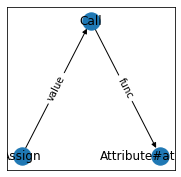

where: [0, 2, 3, 4, 5]

-----------------

t # 4
v 0 Assign
v 1 Call
v 2 Attribute#attr=split
v 3 Load
e 0 1 value
e 1 2 func
e 2 3 ctx

Support: 5


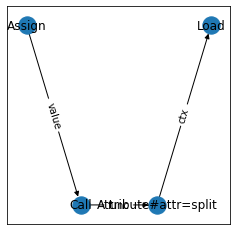

where: [0, 2, 3, 4, 5]

-----------------

t # 5
v 0 Assign
v 1 Call
v 2 Str
e 0 1 value
e 1 2 args

Support: 4


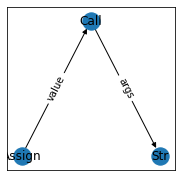

where: [2, 3, 4, 5]

-----------------

t # 6
v 0 Assign
v 1 Call
v 2 Str
v 3 Attribute#attr=split
e 0 1 value
e 1 2 args
e 1 3 func

Support: 4


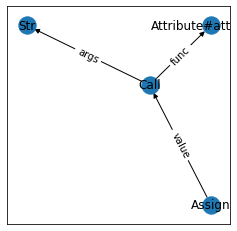

where: [2, 3, 4, 5]

-----------------

t # 7
v 0 Assign
v 1 Call
v 2 Str
v 3 Attribute#attr=split
v 4 Load
e 0 1 value
e 1 2 args
e 1 3 func
e 3 4 ctx

Support: 4


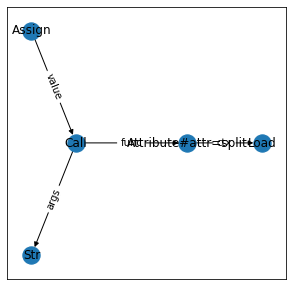

where: [2, 3, 4, 5]

-----------------

t # 8
v 0 Assign
v 1 Call
v 2 Attribute#attr=pop
e 0 1 value
e 1 2 func

Support: 3


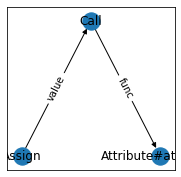

where: [3, 4, 5]

-----------------

t # 9
v 0 Assign
v 1 Call
v 2 Attribute#attr=pop
v 3 Load
e 0 1 value
e 1 2 func
e 2 3 ctx

Support: 3


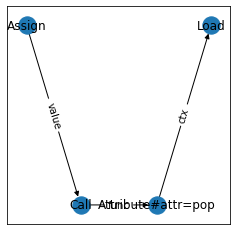

where: [3, 4, 5]

-----------------

t # 10
v 0 Assign
v 1 Module
v 2 Call
e 0 1 body0
e 0 2 value

Support: 5


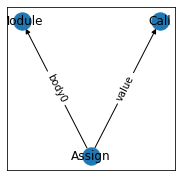

where: [0, 2, 3, 4, 5]

-----------------

t # 11
v 0 Assign
v 1 Module
v 2 Call
v 3 Attribute#attr=split
e 0 1 body0
e 0 2 value
e 2 3 func

Support: 5


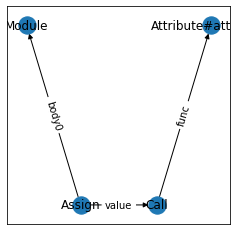

where: [0, 2, 3, 4, 5]

-----------------

t # 12
v 0 Assign
v 1 Module
v 2 Call
v 3 Attribute#attr=split
v 4 Load
e 0 1 body0
e 0 2 value
e 2 3 func
e 3 4 ctx

Support: 5


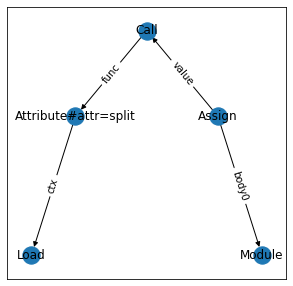

where: [0, 2, 3, 4, 5]

-----------------

t # 13
v 0 Assign
v 1 Module
v 2 Call
v 3 Str
e 0 1 body0
e 0 2 value
e 2 3 args

Support: 4


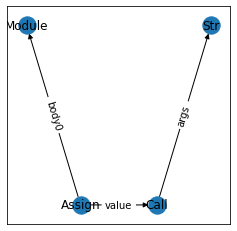

where: [2, 3, 4, 5]

-----------------

t # 14
v 0 Assign
v 1 Module
v 2 Call
v 3 Str
v 4 Attribute#attr=split
e 0 1 body0
e 0 2 value
e 2 3 args
e 2 4 func

Support: 4


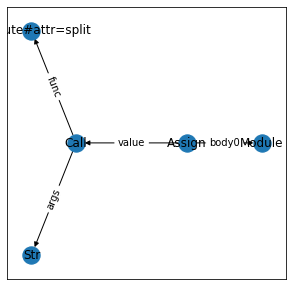

where: [2, 3, 4, 5]

-----------------

t # 15
v 0 Assign
v 1 Module
v 2 Call
v 3 Str
v 4 Attribute#attr=split
v 5 Load
e 0 1 body0
e 0 2 value
e 2 3 args
e 2 4 func
e 4 5 ctx

Support: 4


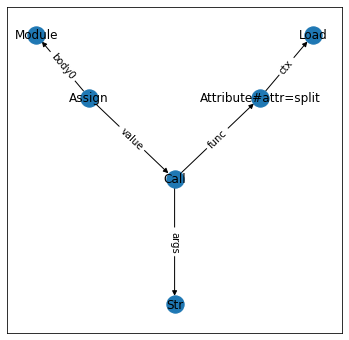

where: [2, 3, 4, 5]

-----------------

t # 16
v 0 Assign
v 1 Module
v 2 Assign
e 0 1 body0
e 1 2 body1

Support: 3


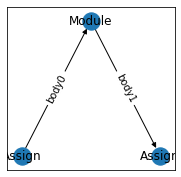

where: [3, 4, 5]

-----------------

t # 17
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
e 0 1 body0
e 1 2 body1
e 2 3 value

Support: 3


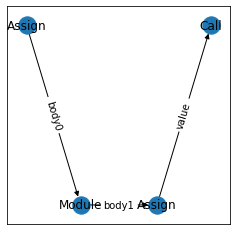

where: [3, 4, 5]

-----------------

t # 18
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
e 0 1 body0
e 1 2 body1
e 2 3 value
e 3 4 func

Support: 3


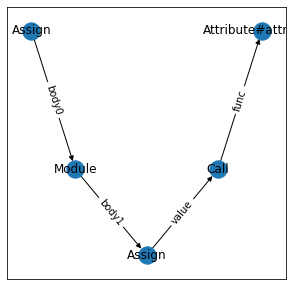

where: [3, 4, 5]

-----------------

t # 19
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Load
e 0 1 body0
e 1 2 body1
e 2 3 value
e 3 4 func
e 4 5 ctx

Support: 3


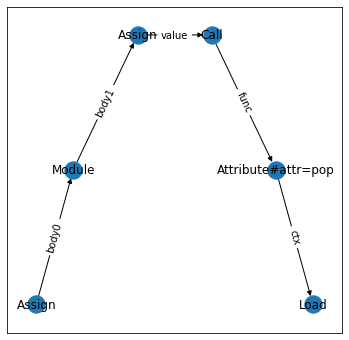

where: [3, 4, 5]

-----------------

t # 20
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Load
v 6 Call
e 0 1 body0
e 0 6 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 4 5 ctx

Support: 3


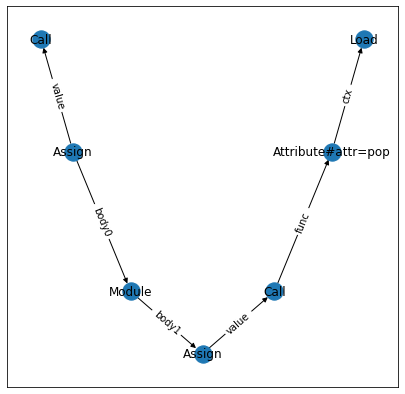

where: [3, 4, 5]

-----------------

t # 21
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Load
v 6 Call
v 7 Str
e 0 1 body0
e 0 6 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 4 5 ctx
e 6 7 args

Support: 3


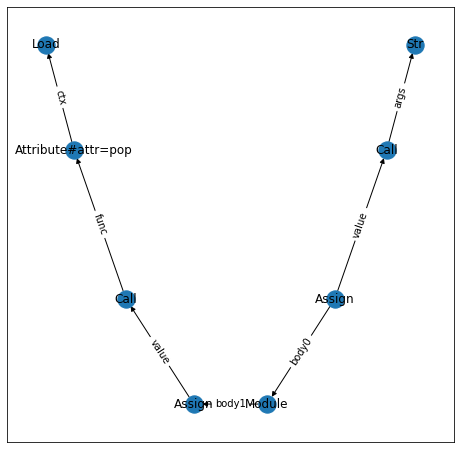

where: [3, 4, 5]

-----------------

t # 22
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Load
v 6 Call
v 7 Str
v 8 Attribute#attr=split
e 0 1 body0
e 0 6 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 4 5 ctx
e 6 7 args
e 6 8 func

Support: 3


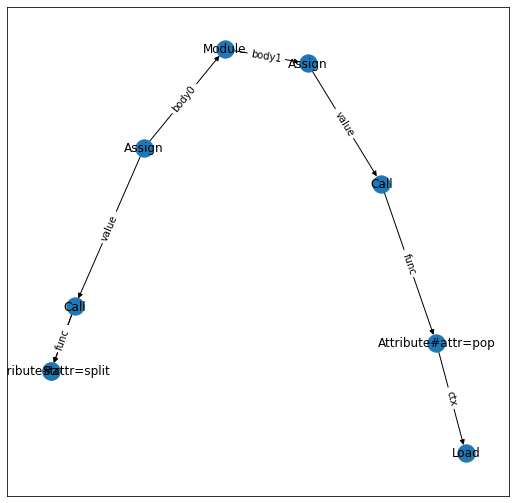

where: [3, 4, 5]

-----------------

t # 23
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Load
v 6 Call
v 7 Str
v 8 Attribute#attr=split
v 9 Load
e 0 1 body0
e 0 6 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 4 5 ctx
e 6 7 args
e 6 8 func
e 8 9 ctx

Support: 3


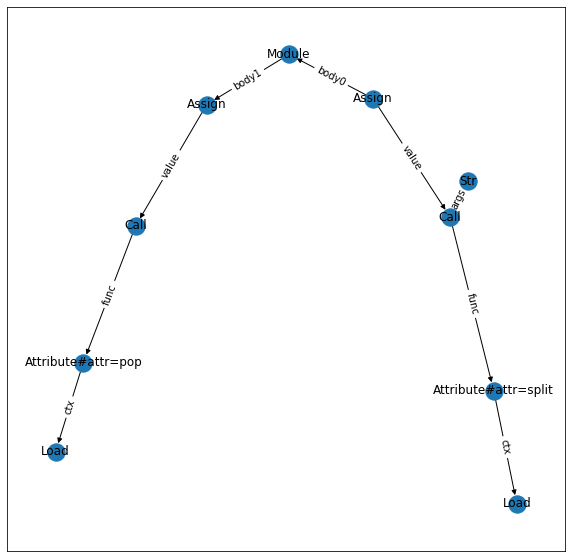

where: [3, 4, 5]

-----------------

t # 24
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Load
v 6 Call
v 7 Attribute#attr=split
e 0 1 body0
e 0 6 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 4 5 ctx
e 6 7 func

Support: 3


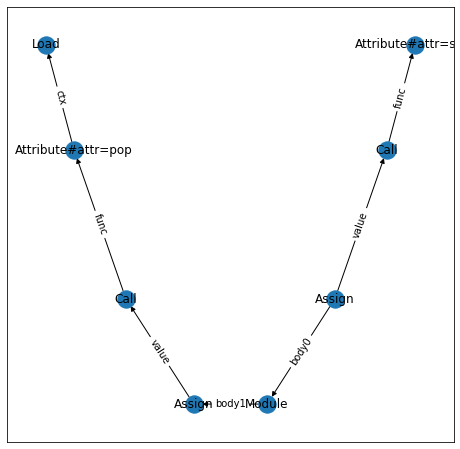

where: [3, 4, 5]

-----------------

t # 25
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Load
v 6 Call
v 7 Attribute#attr=split
v 8 Load
e 0 1 body0
e 0 6 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 4 5 ctx
e 6 7 func
e 7 8 ctx

Support: 3


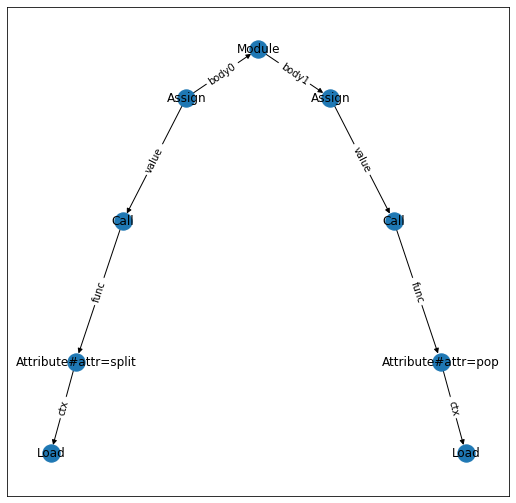

where: [3, 4, 5]

-----------------

t # 26
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Call
e 0 1 body0
e 0 5 value
e 1 2 body1
e 2 3 value
e 3 4 func

Support: 3


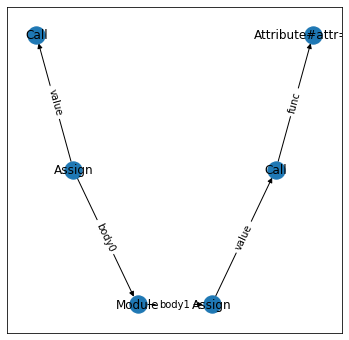

where: [3, 4, 5]

-----------------

t # 27
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Call
v 6 Str
e 0 1 body0
e 0 5 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 5 6 args

Support: 3


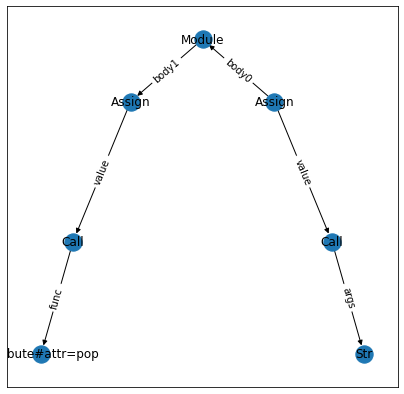

where: [3, 4, 5]

-----------------

t # 28
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Call
v 6 Str
v 7 Attribute#attr=split
e 0 1 body0
e 0 5 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 5 6 args
e 5 7 func

Support: 3


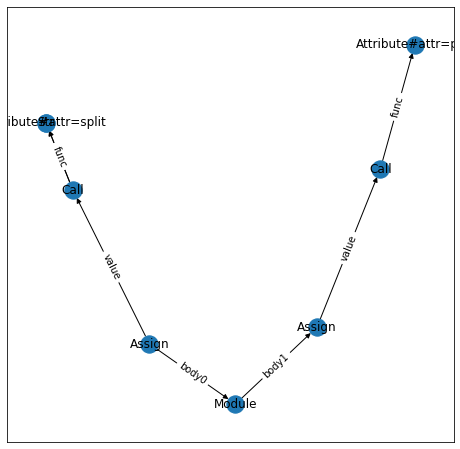

where: [3, 4, 5]

-----------------

t # 29
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Call
v 6 Str
v 7 Attribute#attr=split
v 8 Load
e 0 1 body0
e 0 5 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 5 6 args
e 5 7 func
e 7 8 ctx

Support: 3


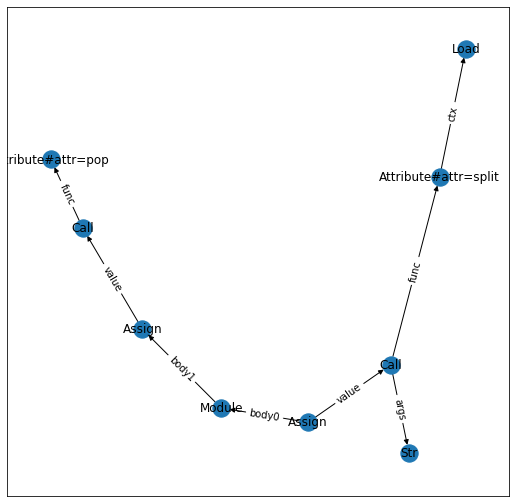

where: [3, 4, 5]

-----------------

t # 30
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Call
v 6 Attribute#attr=split
e 0 1 body0
e 0 5 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 5 6 func

Support: 3


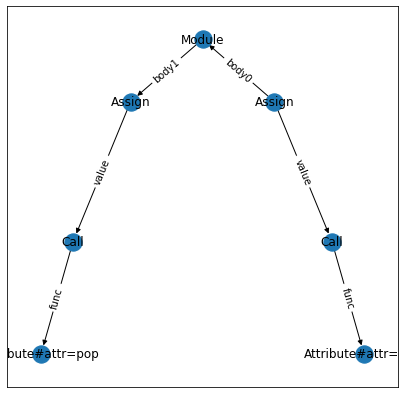

where: [3, 4, 5]

-----------------

t # 31
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=pop
v 5 Call
v 6 Attribute#attr=split
v 7 Load
e 0 1 body0
e 0 5 value
e 1 2 body1
e 2 3 value
e 3 4 func
e 5 6 func
e 6 7 ctx

Support: 3


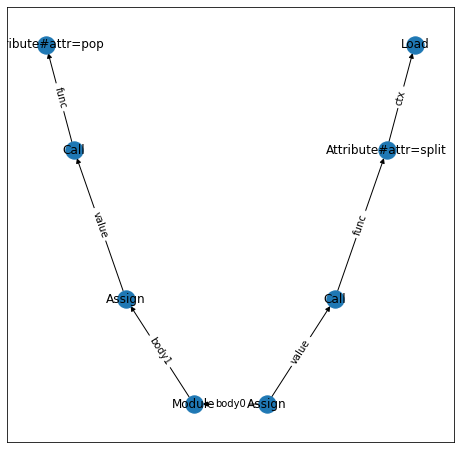

where: [3, 4, 5]

-----------------

t # 32
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Call
e 0 1 body0
e 0 4 value
e 1 2 body1
e 2 3 value

Support: 3


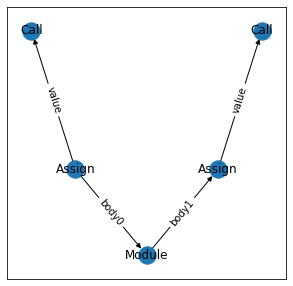

where: [3, 4, 5]

-----------------

t # 33
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Call
v 5 Str
e 0 1 body0
e 0 4 value
e 1 2 body1
e 2 3 value
e 4 5 args

Support: 3


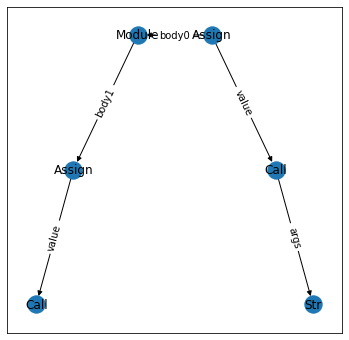

where: [3, 4, 5]

-----------------

t # 34
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Call
v 5 Str
v 6 Attribute#attr=split
e 0 1 body0
e 0 4 value
e 1 2 body1
e 2 3 value
e 4 5 args
e 4 6 func

Support: 3


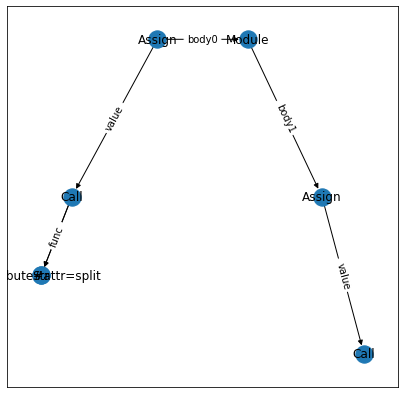

where: [3, 4, 5]

-----------------

t # 35
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Call
v 5 Str
v 6 Attribute#attr=split
v 7 Load
e 0 1 body0
e 0 4 value
e 1 2 body1
e 2 3 value
e 4 5 args
e 4 6 func
e 6 7 ctx

Support: 3


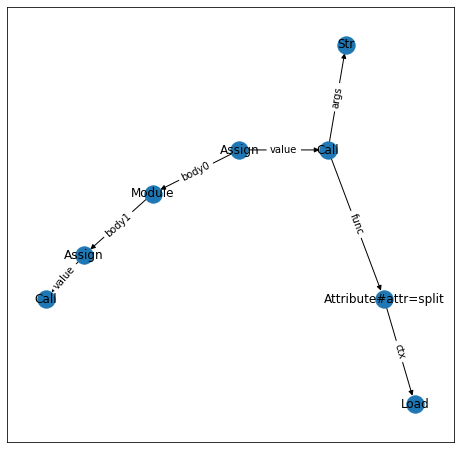

where: [3, 4, 5]

-----------------

t # 36
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Call
v 5 Attribute#attr=split
e 0 1 body0
e 0 4 value
e 1 2 body1
e 2 3 value
e 4 5 func

Support: 3


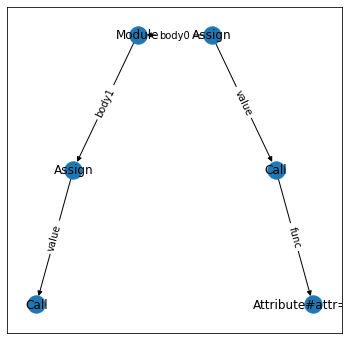

where: [3, 4, 5]

-----------------

t # 37
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Call
v 5 Attribute#attr=split
v 6 Load
e 0 1 body0
e 0 4 value
e 1 2 body1
e 2 3 value
e 4 5 func
e 5 6 ctx

Support: 3


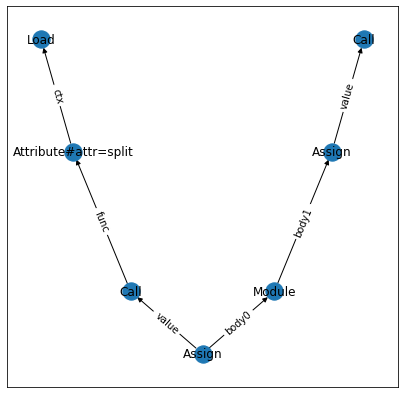

where: [3, 4, 5]

-----------------

t # 38
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
e 0 1 body0
e 0 3 value
e 1 2 body1

Support: 3


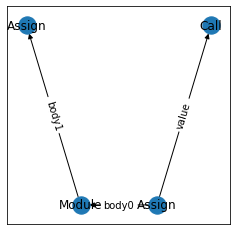

where: [3, 4, 5]

-----------------

t # 39
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Str
e 0 1 body0
e 0 3 value
e 1 2 body1
e 3 4 args

Support: 3


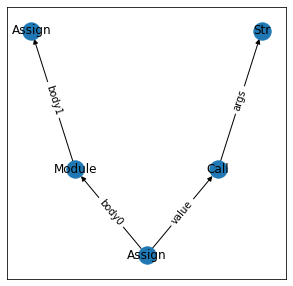

where: [3, 4, 5]

-----------------

t # 40
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Str
v 5 Attribute#attr=split
e 0 1 body0
e 0 3 value
e 1 2 body1
e 3 4 args
e 3 5 func

Support: 3


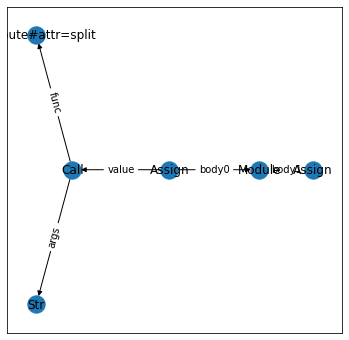

where: [3, 4, 5]

-----------------

t # 41
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Str
v 5 Attribute#attr=split
v 6 Load
e 0 1 body0
e 0 3 value
e 1 2 body1
e 3 4 args
e 3 5 func
e 5 6 ctx

Support: 3


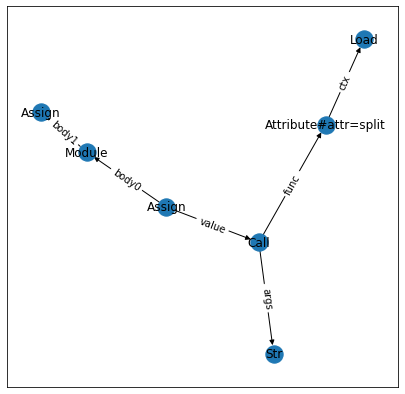

where: [3, 4, 5]

-----------------

t # 42
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=split
e 0 1 body0
e 0 3 value
e 1 2 body1
e 3 4 func

Support: 3


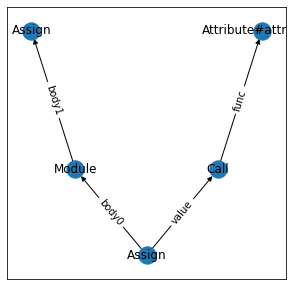

where: [3, 4, 5]

-----------------

t # 43
v 0 Assign
v 1 Module
v 2 Assign
v 3 Call
v 4 Attribute#attr=split
v 5 Load
e 0 1 body0
e 0 3 value
e 1 2 body1
e 3 4 func
e 4 5 ctx

Support: 3


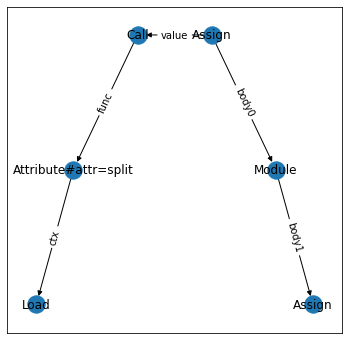

where: [3, 4, 5]

-----------------

t # 44
v 0 Assign
v 1 Module
v 2 Call
e 0 1 body1
e 0 2 value

Support: 3


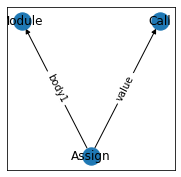

where: [3, 4, 5]

-----------------

t # 45
v 0 Assign
v 1 Module
v 2 Call
v 3 Attribute#attr=pop
e 0 1 body1
e 0 2 value
e 2 3 func

Support: 3


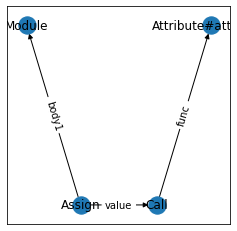

where: [3, 4, 5]

-----------------

t # 46
v 0 Assign
v 1 Module
v 2 Call
v 3 Attribute#attr=pop
v 4 Load
e 0 1 body1
e 0 2 value
e 2 3 func
e 3 4 ctx

Support: 3


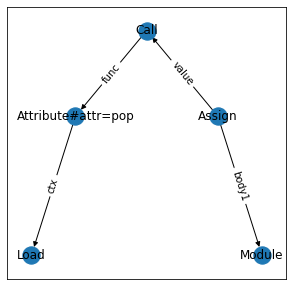

where: [3, 4, 5]

-----------------

t # 47
v 0 Attribute#attr=pop
v 1 Load
v 2 Call
e 0 1 ctx
e 0 2 func

Support: 3


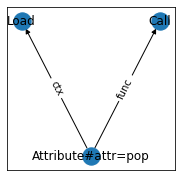

where: [3, 4, 5]

-----------------

Read:	0.0 s
Mine:	18.38 s
Total:	18.38 s


In [13]:
gs = main(FLAGS)